In [1]:
import json
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from script.misc import savefig_pdf

In [2]:
resp = requests.get(
    'https://gtexportal.org/api/v2/expression/medianJunctionExpression',
    params={
        'gencodeId': 'ENSG00000012048.20', # BRCA1
        'datasetId': 'gtex_v8',
        'itemsPerPage': '100000',
        'tissueSiteDetailId': [
            # TARGET TISSUE: BREAST
            "Breast_Mammary_Tissue",
            # --- PANGOLIN MODEL TISSUE TYPES ---
            # BRAIN
            "Brain_Amygdala",
            "Brain_Anterior_cingulate_cortex_BA24",
            "Brain_Caudate_basal_ganglia",
            "Brain_Cerebellar_Hemisphere",
            "Brain_Cerebellum",
            "Brain_Cortex",
            "Brain_Frontal_Cortex_BA9",
            "Brain_Hippocampus",
            "Brain_Hypothalamus",
            "Brain_Nucleus_accumbens_basal_ganglia",
            "Brain_Putamen_basal_ganglia",
            "Brain_Spinal_cord_cervical_c-1",
            "Brain_Substantia_nigra",
            # HEART
            "Heart_Atrial_Appendage",
            "Heart_Left_Ventricle",
            # LIVER
            "Liver",
            # TESTIS
            "Testis"
        ]
    }
)
data = json.loads(resp.content.decode())['data']
df = pd.DataFrame.from_dict(data)
df

,median,junctionId,tissueSiteDetailId,ontologyId,datasetId,gencodeId,geneSymbol,unit
0,3.0,chr17_43045803_43047642,Brain_Amygdala,UBERON:0001876,gtex_v8,ENSG00000012048.20,BRCA1,read count
1,5.0,chr17_43047704_43049120,Brain_Amygdala,UBERON:0001876,gtex_v8,ENSG00000012048.20,BRCA1,read count
2,0.0,chr17_43047704_43051062,Brain_Amygdala,UBERON:0001876,gtex_v8,ENSG00000012048.20,BRCA1,read count
3,0.0,chr17_43049195_43050061,Brain_Amygdala,UBERON:0001876,gtex_v8,ENSG00000012048.20,BRCA1,read count
4,5.0,chr17_43049195_43051062,Brain_Amygdala,UBERON:0001876,gtex_v8,ENSG00000012048.20,BRCA1,read count
...,...,...,...,...,...,...,...,...
805,1.0,chr17_43124116_43124736,Testis,UBERON:0000473,gtex_v8,ENSG00000012048.20,BRCA1,read count
806,0.0,chr17_43124116_43125181,Testis,UBERON:0000473,gtex_v8,ENSG00000012048.20,BRCA1,read count
807,1.0,chr17_43124116_43125270,Testis,UBERON:0000473,gtex_v8,ENSG00000012048.20,BRCA1,read count
808,1.0,chr17_43124116_43125276,Testis,UBERON:0000473,gtex_v8,ENSG00000012048.20,BRCA1,read count


In [3]:
pivot_df = df.pivot_table(index='junctionId', columns='tissueSiteDetailId', values='median')
tissues = list(pivot_df.columns)
tissues.append(tissues.pop(tissues.index('Breast_Mammary_Tissue')))
pivot_df = pivot_df[tissues]
correlation_matrix = pivot_df.corr()
correlation_matrix

tissueSiteDetailId,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,Brain_Nucleus_accumbens_basal_ganglia,Brain_Putamen_basal_ganglia,Brain_Spinal_cord_cervical_c-1,Brain_Substantia_nigra,Heart_Atrial_Appendage,Heart_Left_Ventricle,Liver,Testis,Breast_Mammary_Tissue
tissueSiteDetailId,,,,,,,,,,,,,,,,,,
Brain_Amygdala,1.000000,0.968084,0.981850,0.960221,0.942639,0.976581,0.966258,0.988108,0.963173,0.977052,0.979248,0.980572,0.979550,0.972071,0.979224,0.863829,0.981652,0.971098
Brain_Anterior_cingulate_cortex_BA24,0.968084,1.000000,0.974798,0.973058,0.973058,0.968382,0.978157,0.973035,0.971668,0.980842,0.977068,0.976203,0.978411,0.963856,0.969483,0.896244,0.971909,0.957089
Brain_Caudate_basal_ganglia,0.981850,0.974798,1.000000,0.957765,0.957765,0.982250,0.971052,0.982113,0.969282,0.983437,0.987166,0.988084,0.991338,0.989057,0.988706,0.887574,0.990381,0.983855
Brain_Cerebellar_Hemisphere,0.960221,0.973058,0.957765,1.000000,0.960177,0.955663,0.956487,0.967216,0.952111,0.963410,0.963657,0.967097,0.968927,0.959962,0.952585,0.891187,0.964548,0.946922
Brain_Cerebellum,0.942639,0.973058,0.957765,0.960177,1.000000,0.955663,0.956487,0.950540,0.969079,0.963410,0.963657,0.957677,0.968927,0.959962,0.952585,0.891187,0.960285,0.946922
Brain_Cortex,0.976581,0.968382,0.982250,0.955663,0.955663,1.000000,0.960487,0.977259,0.975537,0.976320,0.985200,0.987084,0.984357,0.977469,0.969323,0.855105,0.985815,0.973743
Brain_Frontal_Cortex_BA9,0.966258,0.978157,0.971052,0.956487,0.956487,0.960487,1.000000,0.971093,0.974591,0.965096,0.967797,0.961671,0.974568,0.965006,0.962344,0.880233,0.965611,0.954933
Brain_Hippocampus,0.988108,0.973035,0.982113,0.967216,0.950540,0.977259,0.971093,1.000000,0.971334,0.987004,0.986833,0.988515,0.981684,0.977956,0.975754,0.889203,0.983190,0.973591
Brain_Hypothalamus,0.963173,0.971668,0.969282,0.952111,0.969079,0.975537,0.974591,0.971334,1.000000,0.969117,0.973016,0.974393,0.984617,0.974974,0.954610,0.867735,0.975492,0.957555


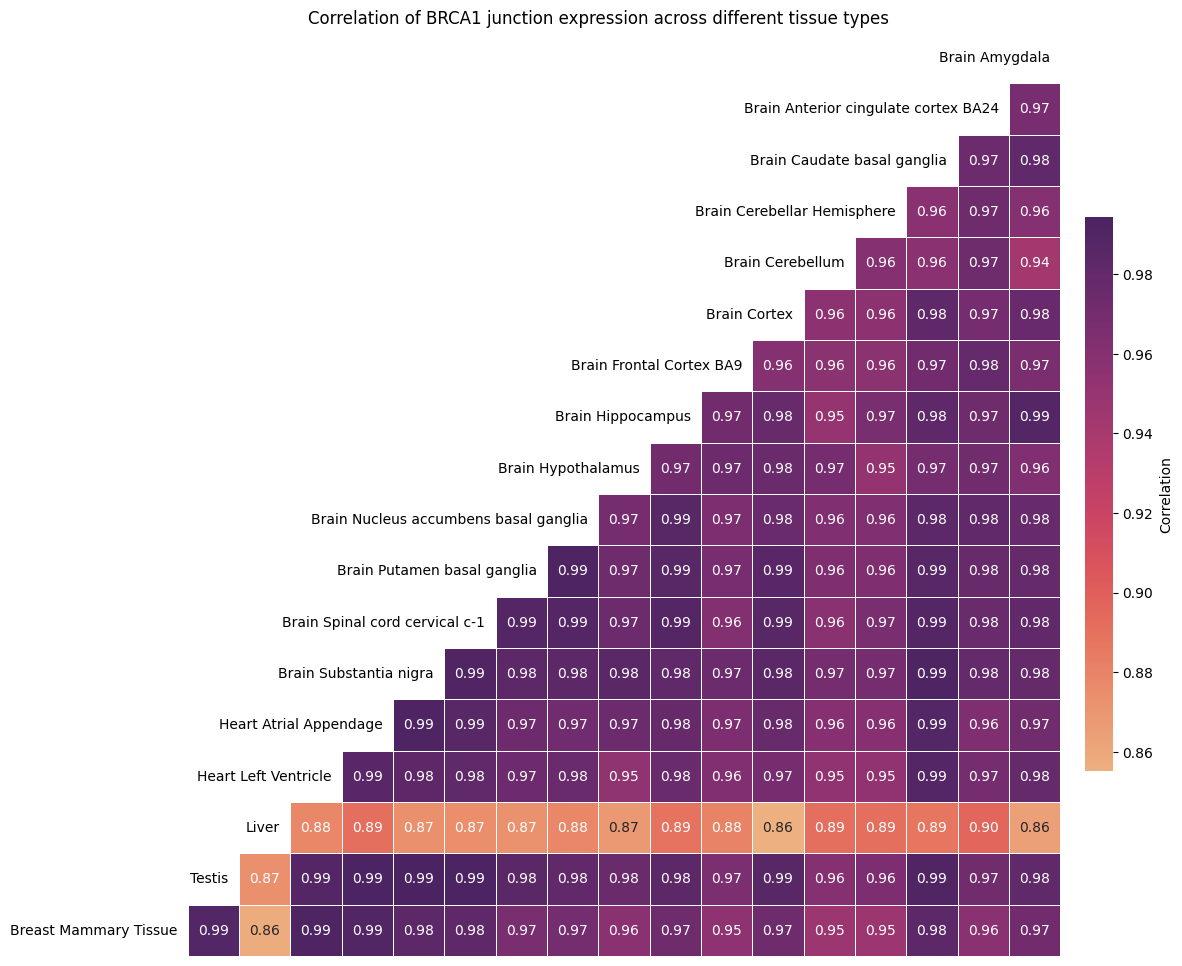

In [4]:
def plot_heatmap(data, labels, legend, annot = True, cmap = 'flare'):
    up_triang = np.triu(np.ones_like(data)).astype(bool)
    ax = sns.heatmap(
        data,
        cmap=cmap, xticklabels=False, yticklabels=False,
        annot=annot, fmt='.2f',
        square=True, linecolor='white', linewidths=0.5,
        mask=up_triang,
        cbar=True if legend else False, cbar_kws={'shrink': 0.6, 'pad': 0.02, 'label': legend}
    )
    ax.invert_xaxis()
    for i, label in enumerate(labels):
        ax.text(i + 0.2, i + 0.5, label, ha='right', va='center')

plt.figure(figsize=(16, 12))
plot_heatmap(correlation_matrix.values, [label.replace('_', ' ') for label in correlation_matrix.columns], 'Correlation')
savefig_pdf('brca1-tissue-expression-correlation')
plt.title('Correlation of BRCA1 junction expression across different tissue types')
plt.show()